<a href="https://colab.research.google.com/github/ankitlade12/COVID-19_Pneumonia_Classification/blob/main/covid19_pneumonia_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# Clone Dataset

In [2]:
!git clone https://github.com/education454/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 32.56 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [4]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])
test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(302).jpg', 'COVID19(190).jpg', 'COVID19(460).jpg', 'COVID-19 (11).jpeg', 'COVID19(531).jpg', 'COVID-19 (331).jpg', 'COVID19(565).jpg', 'COVID19(83).jpg', 'COVID19(205).jpg', 'COVID19(311).jpg']
['NORMAL(438).jpg', 'NORMAL(1518).jpg', 'NORMAL(884).jpg', 'NORMAL(482).jpg', 'NORMAL(516).jpg', 'NORMAL(1032).jpg', 'NORMAL(568).jpg', 'NORMAL(1130).jpg', 'NORMAL(30).jpg', 'NORMAL(1527).jpg']
['COVID19(410).jpg', 'COVID19(382).jpg', 'COVID19(482).jpg', 'COVID19(84).jpg', 'COVID-19 (313).jpg', 'COVID-19 (522).jpg', 'COVID-19 (750).jpg', 'COVID19(396).jpg', 'COVID19(278).jpg', 'COVID19(449).jpg']
['NORMAL(1100).jpg', 'NORMAL(1070).jpg', 'NORMAL(956).jpg', 'NORMAL(390).jpg', 'NORMAL(1118).jpg', 'NORMAL(1394).jpg', 'NORMAL(725).jpg', 'NORMAL(319).jpg', 'NORMAL(179).jpg', 'NORMAL(136).jpg']


In [5]:
print('Train Dataset COVID Images:',len(train_covid_names))
print('Train Dataset NORMAL Images:',len(train_normal_names))
print('Test Dataset COVID Images:',len(test_covid_names))
print('Test Dataset NORMAL Images:',len(test_normal_names))
print('Total Images Train',len(train_covid_names+train_normal_names))
print('Total Images Test',len(test_covid_names+test_normal_names))

Train Dataset COVID Images: 545
Train Dataset NORMAL Images: 1266
Test Dataset COVID Images: 167
Test Dataset NORMAL Images: 317
Total Images Train 1811
Total Images Test 484


# Data Visulaization

['/content/datasets/Data/train/COVID19/COVID19(302).jpg', '/content/datasets/Data/train/COVID19/COVID19(190).jpg', '/content/datasets/Data/train/COVID19/COVID19(460).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (11).jpeg', '/content/datasets/Data/train/COVID19/COVID19(531).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (331).jpg', '/content/datasets/Data/train/COVID19/COVID19(565).jpg', '/content/datasets/Data/train/COVID19/COVID19(83).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(438).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1518).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(884).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(482).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(516).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1032).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(568).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1130).jpg']


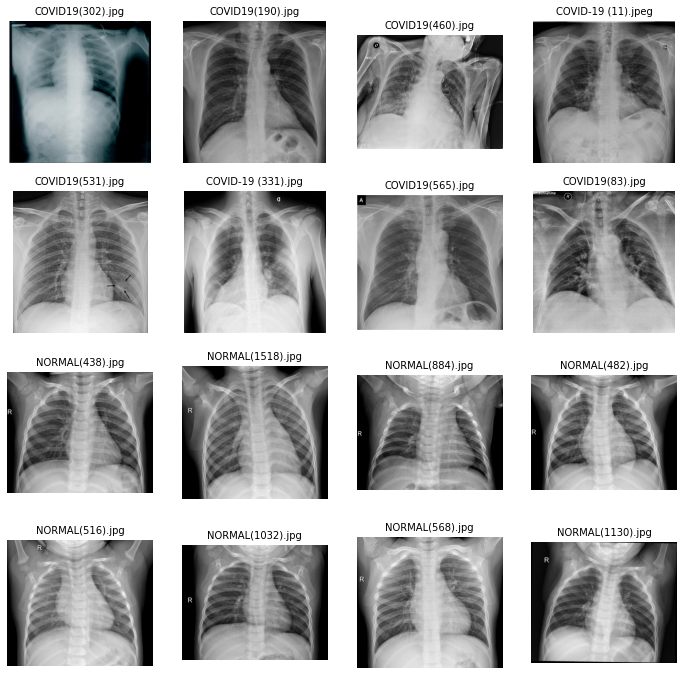

In [6]:
import matplotlib.image as mpimg
nrows = 4
ncolumns = 4
fig = plt.gcf()
fig.set_size_inches(12,12)
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normalpic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]
print(next_covid_pic)
print(next_normalpic)

for i,img_path in enumerate(next_covid_pic+next_normalpic):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(nrows,ncolumns,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()  

# Generating Train, Validataion and Test Batches

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    subset='training',
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    subset='validation',
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
test_generator.image_shape

(150, 150, 3)

# Convolution Neural Network Model (CNN)

In [10]:
model = Sequential()
#
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile and Train Model

In [11]:
from tensorflow.keras.optimizers import Adam
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#train the model
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
46/46 [==============================] - 48s 1s/step - loss: 0.9271 - accuracy: 0.7488 - val_loss: 0.3095 - val_accuracy: 0.8781
Epoch 2/30
46/46 [==============================] - 47s 1s/step - loss: 0.2156 - accuracy: 0.9234 - val_loss: 0.2223 - val_accuracy: 0.9469
Epoch 3/30
46/46 [==============================] - 48s 1s/step - loss: 0.1539 - accuracy: 0.9427 - val_loss: 0.1284 - val_accuracy: 0.9625
Epoch 4/30
46/46 [==============================] - 48s 1s/step - loss: 0.1594 - accuracy: 0.9441 - val_loss: 0.1296 - val_accuracy: 0.9625
Epoch 5/30
46/46 [==============================] - 47s 1s/step - loss: 0.1449 - accuracy: 0.9469 - val_loss: 0.3010 - val_accuracy: 0.9000
Epoch 6/30
46/46 [==============================] - 47s 1s/step - loss: 0.1724 - accuracy: 0.9400 - val_loss: 0.1169 - val_accuracy: 0.9719
Epoch 7/30
46/46 [==============================] - 47s 1s/step - loss: 0.1726 - acc

# Performance Evaluation and Testing the Model

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

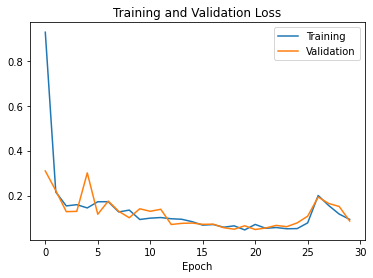

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

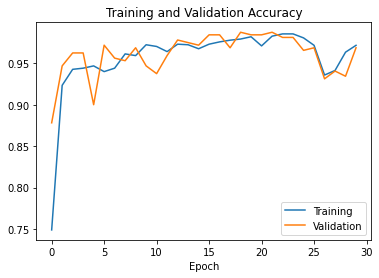

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test Accuarcy:{} Test Loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 9s 587ms/step - loss: 0.1229 - accuracy: 0.9525
Test Accuarcy:0.952479362487793 Test Loss:0.12286825478076935


In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('COVID-19')
  else:
    print('NORMAL')

Saving C.jpeg to C.jpeg
/content/C.jpeg
C.jpeg
COVID-19


In [ ]:
model.save('model.h5')
files.download('model.h5')